In [3]:
import pandas as pd
import numpy as np

In [4]:
# - Read the three files into python as dataframes

df_1 = pd.read_csv("data/file1.csv")
df_2 = pd.read_csv("data/file2.csv")
df_3 = pd.read_csv("data/file3.csv")


In [5]:
# - Show the DataFrame's shape.

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(4008, 11)
(996, 11)
(7070, 11)


In [6]:
# - Standardize header names.

print(df_1.keys())
print(df_2.keys())
print(df_3.keys())  

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')
Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Total Claim Amount', 'Policy Type', 'Vehicle Class'],
      dtype='object')
Index(['Customer', 'State', 'Customer Lifetime Value', 'Education', 'Gender',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Total Claim Amount', 'Vehicle Class'],
      dtype='object')


In [7]:
nombres_columnas = {'State':'state', 'Customer': 'customer', 'ST': 'state', 'GENDER': 'gender', 'Customer Lifetime Value': 'customer_lifetime_value', 'Total Claim Amount': 'total_claim_amount', 'Policy Type': 'policy_type', 'Vehicle Class': 'vehicle_class', 'Number of Open Complaints': 'number_of_open_complaints', 'Monthly Premium Auto': 'monthly_premium_auto', 'Income': 'income', 'Education': 'education'}
df_1.rename(columns=nombres_columnas, inplace=True)
df_2.rename(columns=nombres_columnas, inplace=True)
df_3.rename(columns=nombres_columnas, inplace=True)

print(df_1.keys())
print(df_2.keys())
print(df_3.keys())

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')
Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'total_claim_amount', 'policy_type', 'vehicle_class'],
      dtype='object')
Index(['customer', 'state', 'customer_lifetime_value', 'education', 'Gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class'],
      dtype='object')


In [8]:
# - Rearrange the columns in the dataframe as needed

orden_columnas= ['customer', 'state', 'customer_lifetime_value', 'education', 'gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class']

df_1 = df_1.reindex(columns=orden_columnas)
df_2 = df_2.reindex(columns=orden_columnas)
df_3 = df_3.reindex(columns=orden_columnas)

print(df_1.keys())
print(df_2.keys())
print(df_3.keys())

Index(['customer', 'state', 'customer_lifetime_value', 'education', 'gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class'],
      dtype='object')
Index(['customer', 'state', 'customer_lifetime_value', 'education', 'gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class'],
      dtype='object')
Index(['customer', 'state', 'customer_lifetime_value', 'education', 'gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class'],
      dtype='object')


In [9]:
# - Concatenate the three dataframes

df = pd.concat([df_1,df_2,df_3], axis=0)
print(df.shape)
df.sample()

(12074, 11)


,customer,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class
5506,ME22430,Nevada,2453.570794,Bachelor,NaN,29735.0,69.0,0,Personal Auto,331.2,Four-Door Car


In [10]:
# - Which columns are numerical?

df.select_dtypes('float').sample()

,income,monthly_premium_auto,total_claim_amount
300,26790.0,71.0,340.8


In [11]:
df._get_numeric_data().sample()


,income,monthly_premium_auto,total_claim_amount
6527,24910.0,63.0,347.857619


In [12]:
# - Which columns are categorical?

df.select_dtypes('object').sample()

# pero categoricas realmente solamente son el estado, la educación, el genero, el policy_type y la clase del vehiculo 
# mientras que customer_lifetime_value y numero de quejas son datos numericos pero escritos como un str

,customer,state,customer_lifetime_value,education,gender,number_of_open_complaints,policy_type,vehicle_class
3872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12074 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   state                      9137 non-null   object 
 2   customer_lifetime_value    9130 non-null   object 
 3   education                  9137 non-null   object 
 4   gender                     1945 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly_premium_auto       9137 non-null   float64
 7   number_of_open_complaints  9137 non-null   object 
 8   policy_type                9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
 10  vehicle_class              9137 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [14]:
# - Understand the meaning of all columns
# - Perform the data cleaning operations mentioned so far in class

df.drop_duplicates(inplace=True)


In [15]:
def porc_null(df):
    percent_nulls = round(df.isna().sum() / len(df), 4) * 100
    
    nulls_df = pd.DataFrame(percent_nulls)
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', 'percent_nulls']
    
    return nulls_df

porc_null(df)

,header_name,percent_nulls
0,customer,0.01
1,state,0.01
2,customer_lifetime_value,0.09
3,education,0.01
4,gender,78.74
5,income,0.01
6,monthly_premium_auto,0.01
7,number_of_open_complaints,0.01
8,policy_type,0.01
9,total_claim_amount,0.01


In [16]:
percent_nulls = round(df.isna().sum() / len(df), 4) * 100
percent_nulls


customer                      0.01
state                         0.01
customer_lifetime_value       0.09
education                     0.01
gender                       78.74
income                        0.01
monthly_premium_auto          0.01
number_of_open_complaints     0.01
policy_type                   0.01
total_claim_amount            0.01
vehicle_class                 0.01
dtype: float64

In [17]:
def drop_rows(df, threshold=0.5):
    nulls_per_row = df.isnull().sum(axis=1)
    percent_nulls_per_row = nulls_per_row / len(df.columns)
    
    rows_to_drop = percent_nulls_per_row[percent_nulls_per_row > threshold].index
    
    df = df.drop(index=rows_to_drop, inplace=True)
    
    return df

In [18]:
drop_rows(df)


In [19]:
porc_null(df)

,header_name,percent_nulls
0,customer,0.00
1,state,0.00
2,customer_lifetime_value,0.08
3,education,0.00
4,gender,78.74
5,income,0.00
6,monthly_premium_auto,0.00
7,number_of_open_complaints,0.00
8,policy_type,0.00
9,total_claim_amount,0.00


In [20]:
def drop_col(df, threshold=0.6):
    nulls_per_col = df.isnull().sum(axis=0)
    percent_nulls_per_col = nulls_per_col / len(df)
    
    cols_to_drop = percent_nulls_per_col[percent_nulls_per_col > threshold].index
    df = df.drop(columns=cols_to_drop, inplace=True)
    
    return df

In [21]:
drop_col(df)
df.head()

,customer,state,customer_lifetime_value,education,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class
0,RB50392,Washington,NaN,Master,0.0,1000.0,1/0/00,Personal Auto,2.704934,Four-Door Car
1,QZ44356,Arizona,697953.59%,Bachelor,0.0,94.0,1/0/00,Personal Auto,1131.464935,Four-Door Car
2,AI49188,Nevada,1288743.17%,Bachelor,48767.0,108.0,1/0/00,Personal Auto,566.472247,Two-Door Car
3,WW63253,California,764586.18%,Bachelor,0.0,106.0,1/0/00,Corporate Auto,529.881344,SUV
4,GA49547,Washington,536307.65%,High School or Below,36357.0,68.0,1/0/00,Personal Auto,17.269323,Four-Door Car


In [22]:
porc_null(df)

,header_name,percent_nulls
0,customer,0.00
1,state,0.00
2,customer_lifetime_value,0.08
3,education,0.00
4,income,0.00
5,monthly_premium_auto,0.00
6,number_of_open_complaints,0.00
7,policy_type,0.00
8,total_claim_amount,0.00
9,vehicle_class,0.00


In [23]:
#   - Delete the column education and the number of open complaints from the dataframe.

df.drop(columns="education", inplace=True)
df.drop(columns= "number_of_open_complaints", inplace=True)

In [24]:
#   - Correct the values in the column customer lifetime value. They are given as a percent, so multiply them by 100 and change `dtype` to `numerical` type.

def porc_to_num(columnas):
    output = []
    for i in columnas:
        if isinstance(i, str): 
            numero = pd.to_numeric(i.replace('%', ''), errors='coerce') * 100
        else:
            numero = i * 100  
        output.append(round(numero, 2))

    return output


In [25]:
map_lifetime = porc_to_num(df["customer_lifetime_value"])
df["customer_lifetime_value"] = map_lifetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9133 entries, 0 to 7069
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer                 9133 non-null   object 
 1   state                    9133 non-null   object 
 2   customer_lifetime_value  9126 non-null   float64
 3   income                   9133 non-null   float64
 4   monthly_premium_auto     9133 non-null   float64
 5   policy_type              9133 non-null   object 
 6   total_claim_amount       9133 non-null   float64
 7   vehicle_class            9133 non-null   object 
dtypes: float64(4), object(4)
memory usage: 642.2+ KB


In [26]:
df.head()

,customer,state,customer_lifetime_value,income,monthly_premium_auto,policy_type,total_claim_amount,vehicle_class
0,RB50392,Washington,NaN,0.0,1000.0,Personal Auto,2.704934,Four-Door Car
1,QZ44356,Arizona,69795359.0,0.0,94.0,Personal Auto,1131.464935,Four-Door Car
2,AI49188,Nevada,128874317.0,48767.0,108.0,Personal Auto,566.472247,Two-Door Car
3,WW63253,California,76458618.0,0.0,106.0,Corporate Auto,529.881344,SUV
4,GA49547,Washington,53630765.0,36357.0,68.0,Personal Auto,17.269323,Four-Door Car


In [27]:
#   - Filter out the data for customers who have an income of 0 or less.

def income_0(df):
    filtro = df['income'] <= 0
    df = df[~filtro] 
    
    return df


In [28]:
df = income_0(df)
df

,customer,state,customer_lifetime_value,income,monthly_premium_auto,policy_type,total_claim_amount,vehicle_class
2,AI49188,Nevada,1.288743e+08,48767.0,108.0,Personal Auto,566.472247,Two-Door Car
4,GA49547,Washington,5.363076e+07,36357.0,68.0,Personal Auto,17.269323,Four-Door Car
5,OC83172,Oregon,8.256298e+07,62902.0,69.0,Personal Auto,159.383042,Two-Door Car
6,XZ87318,Oregon,5.380899e+07,55350.0,67.0,Corporate Auto,321.600000,Four-Door Car
8,DY87989,Oregon,2.412750e+08,14072.0,71.0,Corporate Auto,511.200000,Four-Door Car
...,...,...,...,...,...,...,...,...
7063,TF56202,California,5.032165e+05,66367.0,64.0,Personal Auto,307.200000,Two-Door Car
7064,YM19146,California,4.100398e+05,47761.0,104.0,Personal Auto,541.282007,Four-Door Car
7065,LA72316,California,2.340599e+06,71941.0,73.0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3.096511e+05,21604.0,79.0,Corporate Auto,379.200000,Four-Door Car


In [29]:
# - Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.

df_4 = pd.read_csv("data/marketing_customer_analysis.csv")
df_4.head()


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [30]:
df_4["Effective To Date"] = pd.to_datetime(df_4["Effective To Date"])

df_primer_trimestre = df_4[df_4["Effective To Date"].dt.quarter == 1]
df_primer_trimestre.head()

C:\Users\usuario\AppData\Local\Temp\ipykernel_13184\94411782.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_4["Effective To Date"] = pd.to_datetime(df_4["Effective To Date"])


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [31]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
import numpy as np
import pandas as pd
import random
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

In [32]:
df_4.drop(columns='Unnamed: 0', inplace=True)

In [33]:
df_4.describe()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,2011-01-29 22:50:02.749771008,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,2011-01-16 00:00:00,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,2011-01-30 00:00:00,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,2011-02-14 00:00:00,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6885.081434,NaN,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556


In [34]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       10910 non-null  object        
 1   State                          10279 non-null  object        
 2   Customer Lifetime Value        10910 non-null  float64       
 3   Response                       10279 non-null  object        
 4   Coverage                       10910 non-null  object        
 5   Education                      10910 non-null  object        
 6   Effective To Date              10910 non-null  datetime64[ns]
 7   EmploymentStatus               10910 non-null  object        
 8   Gender                         10910 non-null  object        
 9   Income                         10910 non-null  int64         
 10  Location Code                  10910 non-null  object        
 11  Marital Status 

In [35]:
df_4["Response"].value_counts()

Response
No     8813
Yes    1466
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


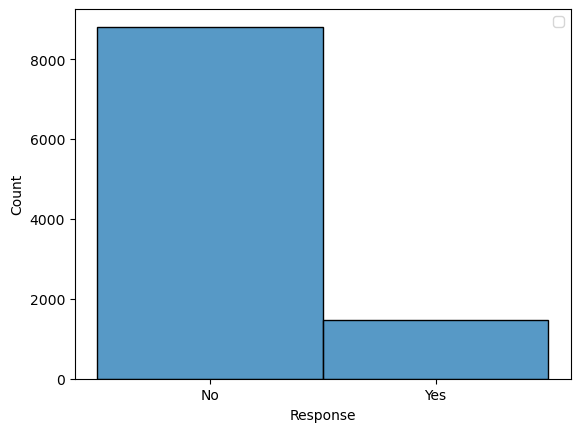

In [36]:
sns.histplot(df_4["Response"], bins=20)
plt.legend();

In [37]:
df_4.keys()

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [38]:
df_4['Sales Channel'].value_counts()

Sales Channel
Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: count, dtype: int64

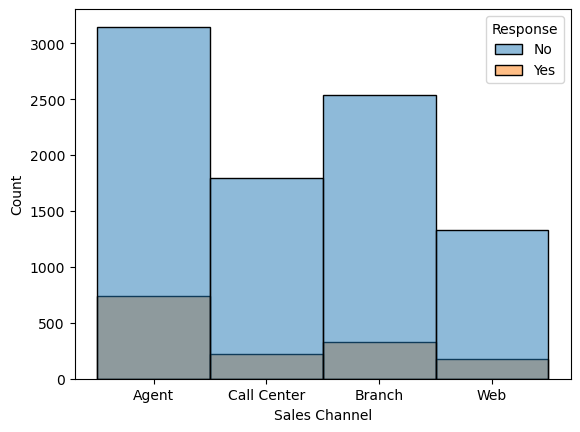

In [39]:
sns.histplot(data=df_4, x="Sales Channel", hue="Response", bins=20)
plt.show()

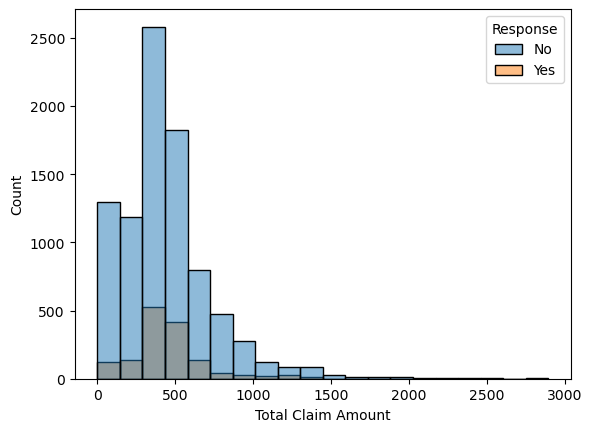

In [40]:
sns.histplot(data=df_4, x="Total Claim Amount", hue="Response", bins=20)
plt.show()

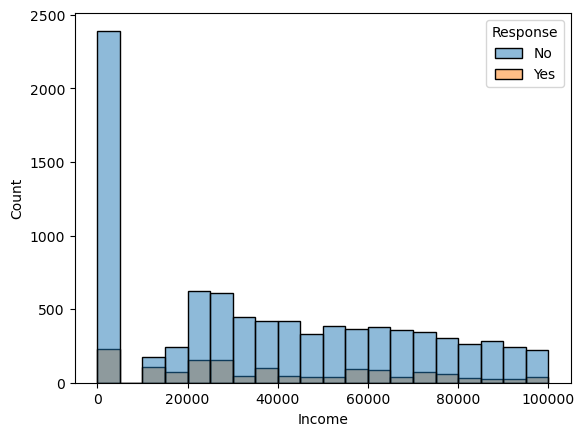

In [41]:
sns.histplot(data=df_4, x="Income", hue="Response", bins=20)
plt.show()

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.

In [42]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       10910 non-null  object        
 1   State                          10279 non-null  object        
 2   Customer Lifetime Value        10910 non-null  float64       
 3   Response                       10279 non-null  object        
 4   Coverage                       10910 non-null  object        
 5   Education                      10910 non-null  object        
 6   Effective To Date              10910 non-null  datetime64[ns]
 7   EmploymentStatus               10910 non-null  object        
 8   Gender                         10910 non-null  object        
 9   Income                         10910 non-null  int64         
 10  Location Code                  10910 non-null  object        
 11  Marital Status 

In [43]:
df_numericas = df_4.select_dtypes(include=['int', 'float'])

df_categoricas = df_4.select_dtypes(include=['object'])

df_numericas.info()
df_categoricas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        10910 non-null  float64
 1   Income                         10910 non-null  int64  
 2   Monthly Premium Auto           10910 non-null  int64  
 3   Months Since Last Claim        10277 non-null  float64
 4   Months Since Policy Inception  10910 non-null  int64  
 5   Number of Open Complaints      10277 non-null  float64
 6   Number of Policies             10910 non-null  int64  
 7   Total Claim Amount             10910 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 682.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer          10910 non-null  

In [44]:
df_numericas.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [70]:
def graf_dist(columna, bins=15):
    sns.histplot(columna, kde=True, bins=bins)
    sns.displot(df[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()


In [71]:
df_numericas.keys()

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

KeyError: "None of [Index([ 4809.21696, 2228.525238,  14947.9173, 22332.43946, 9025.067525,\n       4745.181764, 5035.035257, 4956.247235, 5989.773931, 17114.32815,\n       ...\n       6423.739052, 4547.892543, 3579.023825, 2771.663013, 19228.46362,\n       15563.36944, 5259.444853,  23893.3041, 11971.97765, 6857.519928],\n      dtype='float64', length=10910)] are in the [columns]"

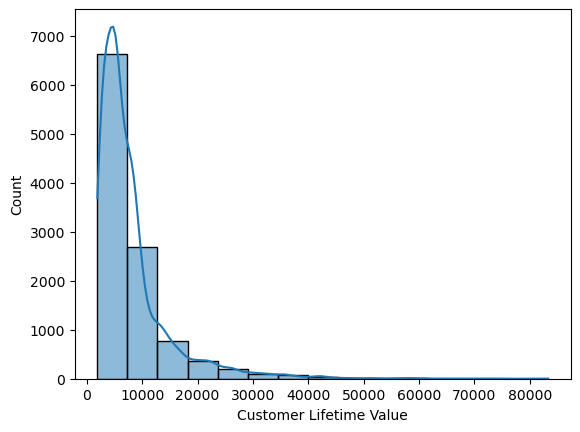

In [72]:
graf_dist(df_numericas["Customer Lifetime Value"])

KeyError: "None of [Index([48029,     0, 22139, 49078, 23675, 50549, 37405, 87197, 66839, 70961,\n       ...\n           0, 33531, 28304, 59855,     0,     0, 61146, 39837, 64195,     0],\n      dtype='int64', length=10910)] are in the [columns]"

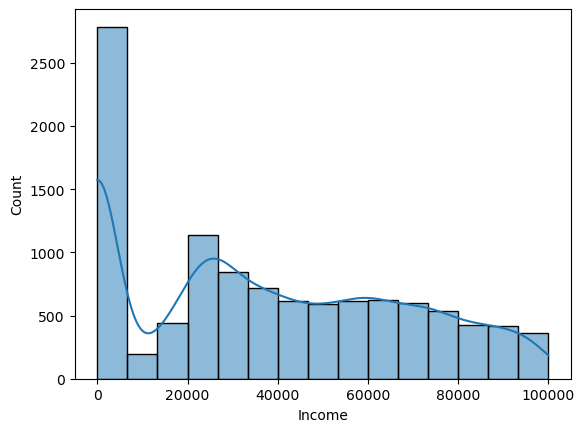

In [77]:
graf_dist(df_numericas["Income"])

KeyError: "None of [Index([ 61,  64, 100,  97, 117,  61,  63,  63, 154,  85,\n       ...\n       188, 116,  91,  74, 187, 253,  65, 201, 158, 101],\n      dtype='int64', length=10910)] are in the [columns]"

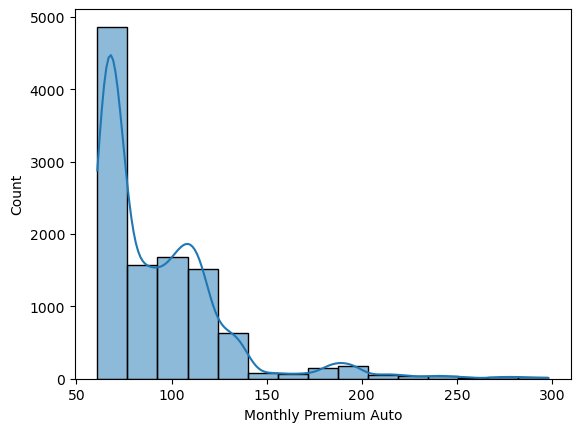

In [78]:
graf_dist(df_numericas["Monthly Premium Auto"])

KeyError: "None of [Index([ 7.0,  3.0, 34.0, 10.0,  nan,  2.0,  8.0, 35.0, 33.0, 19.0,\n       ...\n        5.0, 11.0, 10.0, 30.0, 14.0,  nan,  7.0, 11.0,  0.0, 31.0],\n      dtype='float64', length=10910)] are in the [columns]"

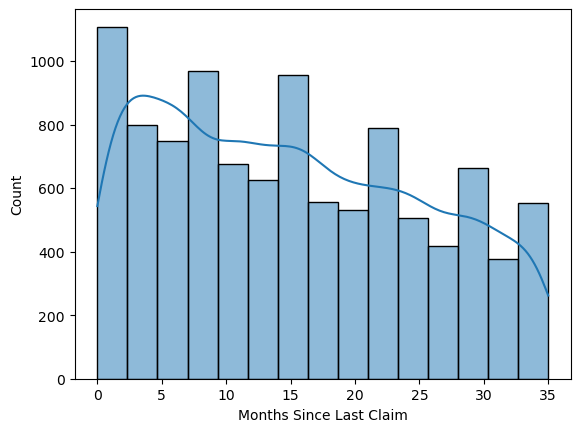

In [79]:
graf_dist(df_numericas["Months Since Last Claim"])

KeyError: "None of [Index([52, 26, 31,  3, 31, 73, 99, 45, 24,  8,\n       ...\n       67, 15, 30, 82, 32, 40, 68, 63, 27,  1],\n      dtype='int64', length=10910)] are in the [columns]"

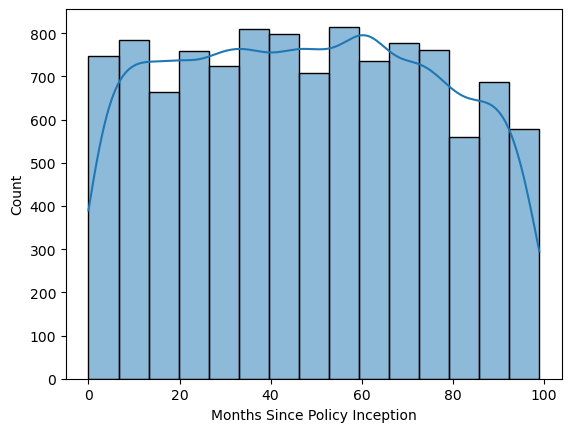

In [80]:
graf_dist(df_numericas["Months Since Policy Inception"])

KeyError: "None of [Index([0.0, 0.0, 0.0, 0.0, nan, 0.0, 3.0, 0.0, 0.0, 0.0,\n       ...\n       0.0, 0.0, 2.0, 4.0, 0.0, nan, 0.0, 0.0, 4.0, 0.0],\n      dtype='float64', length=10910)] are in the [columns]"

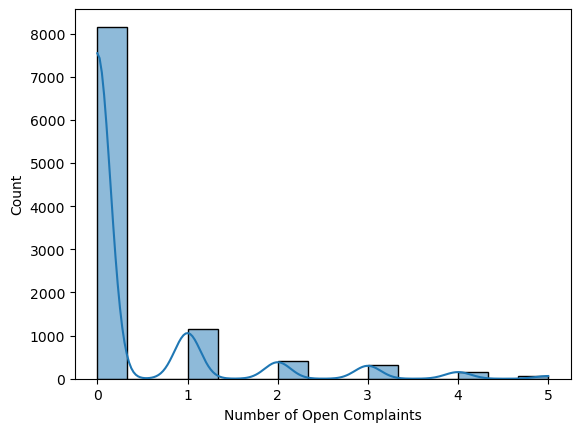

In [86]:
graf_dist(df_numericas["Number of Open Complaints"])

KeyError: "None of [Index([9, 1, 2, 2, 7, 7, 4, 3, 1, 2,\n       ...\n       1, 1, 1, 1, 2, 7, 6, 2, 6, 3],\n      dtype='int64', length=10910)] are in the [columns]"

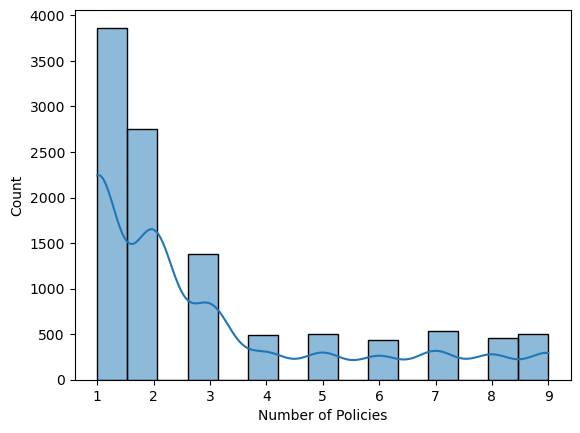

In [88]:
graf_dist(df_numericas["Number of Policies"])

KeyError: "None of [Index([      292.8,  744.924331,       480.0,  484.013411,  707.925645,\n             292.8,  287.556107,  247.402353,       739.2,       408.0,\n       ...\n       1621.560425,  801.577478,       655.2,       355.2,       897.6,\n            1214.4,  273.018929,  381.306996,  618.288849, 1021.719397],\n      dtype='float64', length=10910)] are in the [columns]"

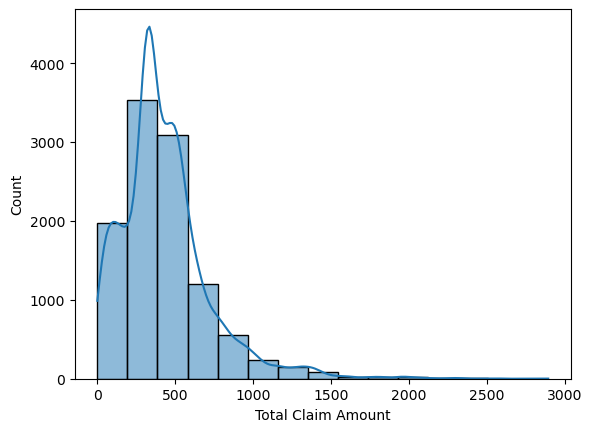

In [90]:
graf_dist(df_numericas["Total Claim Amount"])

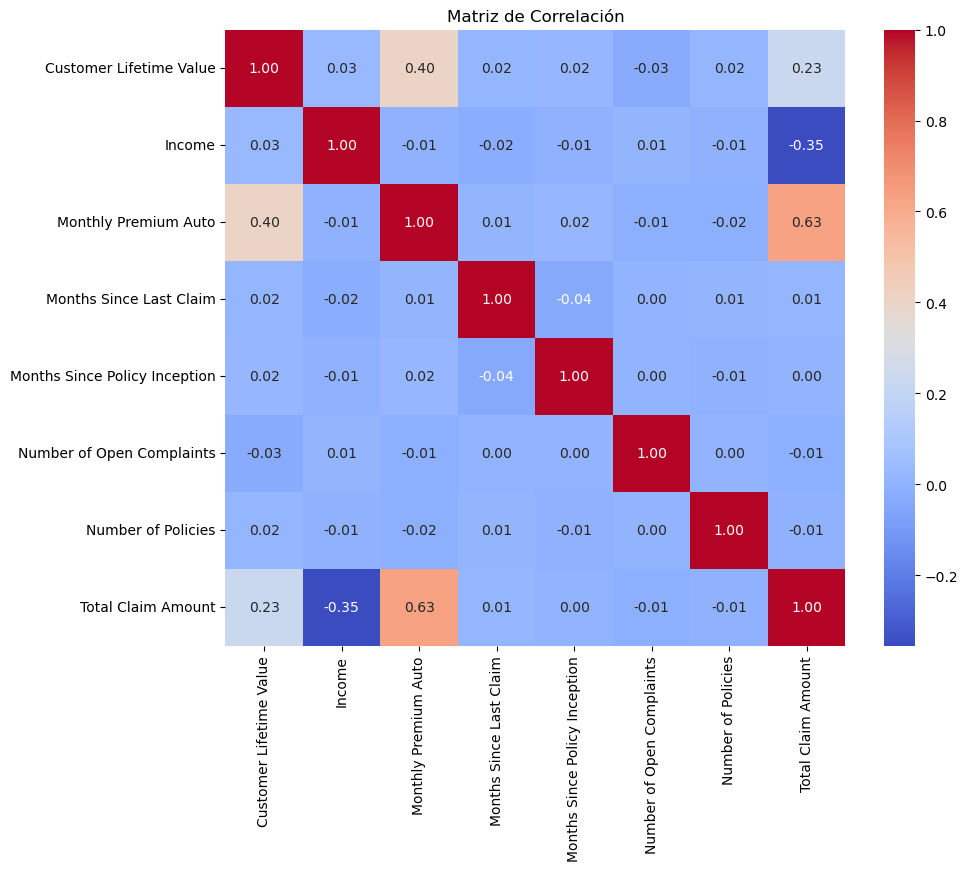

In [91]:
correlation_matrix = df_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()